![](1.png)

![](2.png)

In [5]:
## Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
## fetching and loading the dataset

url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### From the above problem statement we are asked to build a model which can predict whether the loan applicant be approved or not, since the the outcome "Loan_Status" has two classes Yes(Y) and No(N) we can say that is a classification problem and Binary classification.

In [7]:
data.shape

(614, 13)

### From the data.shape we can see that our dataset has 614 records(rows) and 13 attributes(columns)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### From the info() method we can see some details about our dataset, like the "data type" (dtypes), the columns indexes and the "Non-Null Count". we can see that some  columns of our dataset have the same non-null count less 614, this mean there  missing values in the dataset.

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### This show the same of missig values (NAN) in each columns

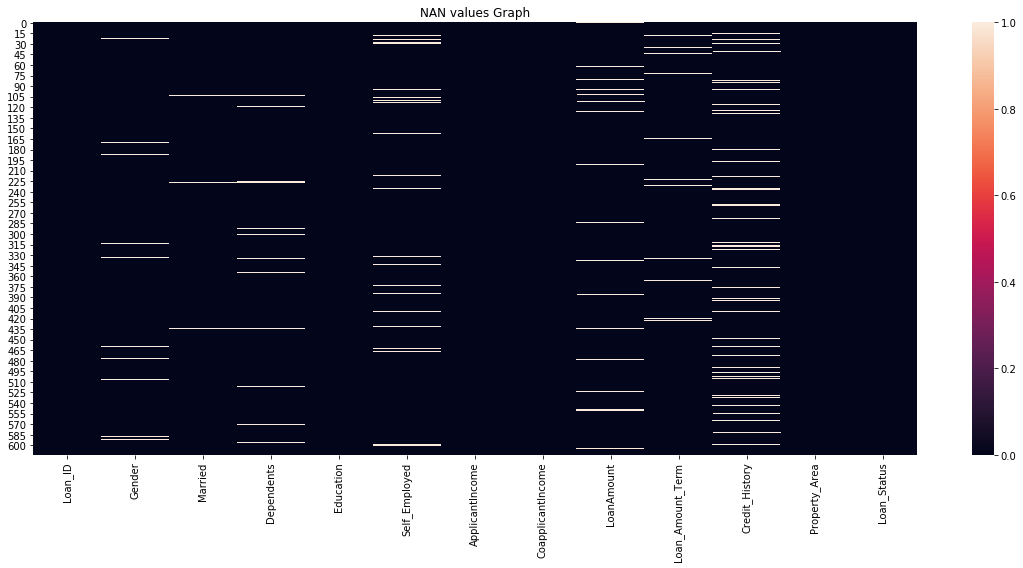

In [10]:
### let's plot it see it visually

plt.figure(figsize=(16,8))
sns.heatmap(data.isna())
plt.title("NAN values Graph")
plt.tight_layout()

### Can see some white color in some attributes and they represente the missing values .

In [11]:
## This will help us to see how is the shape of the data in each column and it  will help to drop some columns if they are not important.

for column in data.columns:
    print(data[column].value_counts())
    print('**'*20)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************
Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2

### From the above code I can the shape of the data in each column and I think the columns are important except "Loan_ID" because it a nominal, so let's drop it.

In [12]:
data.drop('Loan_ID',axis=1,inplace=True)

### Now let's seperate our dataset into two subset: Numerical data and non-numerical data since some columns have text data.

In [21]:
non_num_data = data.drop(data.describe().columns,axis=1)

In [22]:
## let's check it.

non_num_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N


In [23]:
num_data = data.drop(non_num_data,axis=1)
num_data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


### first let's fill the missing values of the num_data.

In [24]:
num_data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

###  I will fill the messing values using __KNNImputer__ because I think that the 3 columns "LoanAmount","Loan_Amount_Term","Credit_History" are related to "ApplicantIncome" 

In [25]:
# Knn imputer will try to find the relation with other column and impute the data
# according the relaton with other columns.

from sklearn.impute import KNNImputer

In [26]:

knn_ipm = KNNImputer(n_neighbors=5)

In [27]:
loanA = knn_ipm.fit_transform(num_data[['ApplicantIncome','LoanAmount']])

In [28]:
loanA

array([[5849. ,  179.4],
       [4583. ,  128. ],
       [3000. ,   66. ],
       ...,
       [8072. ,  253. ],
       [7583. ,  187. ],
       [4583. ,  133. ]])

In [29]:
loadATC = knn_ipm.fit_transform(num_data[['ApplicantIncome','Loan_Amount_Term']])

In [30]:
creditH = knn_ipm.fit_transform(num_data[['ApplicantIncome','Credit_History']])

In [31]:
## now let's update the num_data with new values 

num_data['LoanAmount'] = loanA
num_data['Loan_Amount_Term'] = loadATC
num_data['Credit_History'] = creditH 

In [32]:
### verification
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

#### we can see that num_data doesnot have missing values anymore.

### Now let's fill the missing values for  the non_numerical data ..

In [33]:
for column in non_num_data.columns:
    print(non_num_data[column].value_counts())
    print('**'*20)

Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
****************************************
Y    422
N    192
Name: Loan_Status, dtype: int64
****************************************


In [35]:
## for the column "Dependents" it has NAN values  and also  "3+" is a problem. so let's solve this problem.
non_num_data["Dependents"] = non_num_data["Dependents"].replace({"3+":3})

In [36]:
non_num_data.Dependents.unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [38]:
non_num_data.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

### The columns "Gender","Dependents","Self_Employed","Married" of non_numerical data , i will fill the missing values with the __mode__ of the columns.

In [44]:
non_num_data =non_num_data.fillna({
    'Gender':'Male',
    'Dependents':0,
    'Self_Employed':'No',
    'Married':'Yes'
    
    })

In [45]:
## let's verify it.

non_num_data.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

### Now let's Encoder the text data into numerical data .

In [46]:
# column "Loan_Status" how label

non_num_data['Loan_Status'] = non_num_data['Loan_Status'].replace({'Y':1,"N":0})
non_num_data.Loan_Status.unique()

array([1, 0])

In [47]:
non_num_data['Education'] = non_num_data['Education'].replace({'Graduate':1,"Not Graduate":0})
non_num_data.Education.unique()


array([1, 0])

In [48]:
non_num_data['Married'] = non_num_data['Married'].replace({'Yes':1,"No":0})
non_num_data.Married.unique()


array([0, 1])

In [50]:
non_num_data['Gender'] = non_num_data['Gender'].replace({'Male':1,"Female":0})
non_num_data.Gender.unique()

array([1, 0])

In [51]:
non_num_data['Self_Employed'] = non_num_data['Self_Employed'].replace({'Yes':1,"No":0})
non_num_data.Self_Employed.unique()


array([0, 1])

In [52]:
non_num_data['Property_Area'] = non_num_data['Property_Area'].replace({'Urban':2,"Semiurban":1,"Rural":0})
non_num_data.Property_Area.unique()


array([2, 0, 1])

In [53]:
non_num_data.head(4)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,1,0,2,1
1,1,1,1,1,0,0,0
2,1,1,0,1,1,2,1
3,1,1,0,0,0,2,1


### Let's  concatinate the both sub dataset into a single dataset.

In [54]:
new_data = pd.concat([num_data,non_num_data],axis=1)

In [55]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,5849.0,5849.0,5849.0,1,0,0,1,0,2,1
1,4583,1508.0,4583.0,4583.0,4583.0,1,1,1,1,0,0,0
2,3000,0.0,3000.0,3000.0,3000.0,1,1,0,1,1,2,1
3,2583,2358.0,2583.0,2583.0,2583.0,1,1,0,0,0,2,1
4,6000,0.0,6000.0,6000.0,6000.0,1,0,0,1,0,2,1


In [56]:
## let's save this cleaned data 
new_data.to_csv('cleaned_data.csv',index=False)

In [58]:
## let's the save data and continue the further process.

X_data = pd.read_csv('cleaned_data.csv')

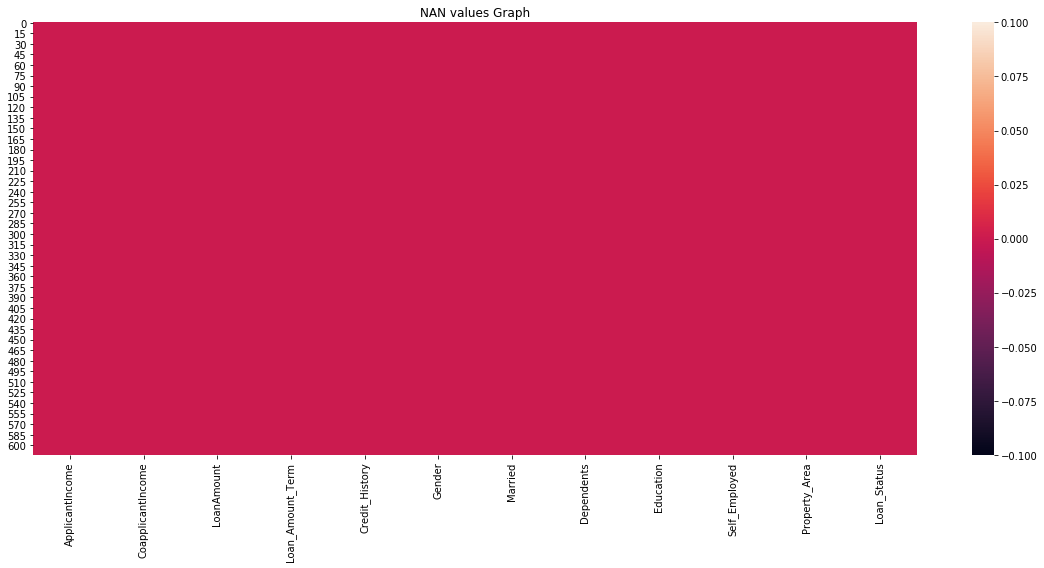

In [60]:
### let's plot it see it visually

plt.figure(figsize=(16,8))
sns.heatmap(X_data.isna())
plt.title("NAN values Graph")
plt.tight_layout()

### All the surface of the heatmap is red and this means there is no missing value in our dataset

In [59]:
X_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,5403.459283,5403.459283,5403.459283,0.817590,0.653094,0.744300,0.781759,0.133550,1.037459,0.687296
std,6109.041673,2926.248369,6109.041673,6109.041673,6109.041673,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,0.463973
min,150.000000,0.000000,150.000000,150.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,2877.500000,2877.500000,2877.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,3812.500000,3812.500000,3812.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,5795.000000,2297.250000,5795.000000,5795.000000,5795.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,81000.000000,41667.000000,81000.000000,81000.000000,81000.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


### From the above describe method we can see some statistical distrubution of columns of our dataset.the can see the column "count", "mean", standard deviation ("std"), the min and max and also the quantiles. The statistical distribution in eacg column look good except "Self_Employed" and "Capital_loss","Loan_Amount_Term" and "Credit_History columns.

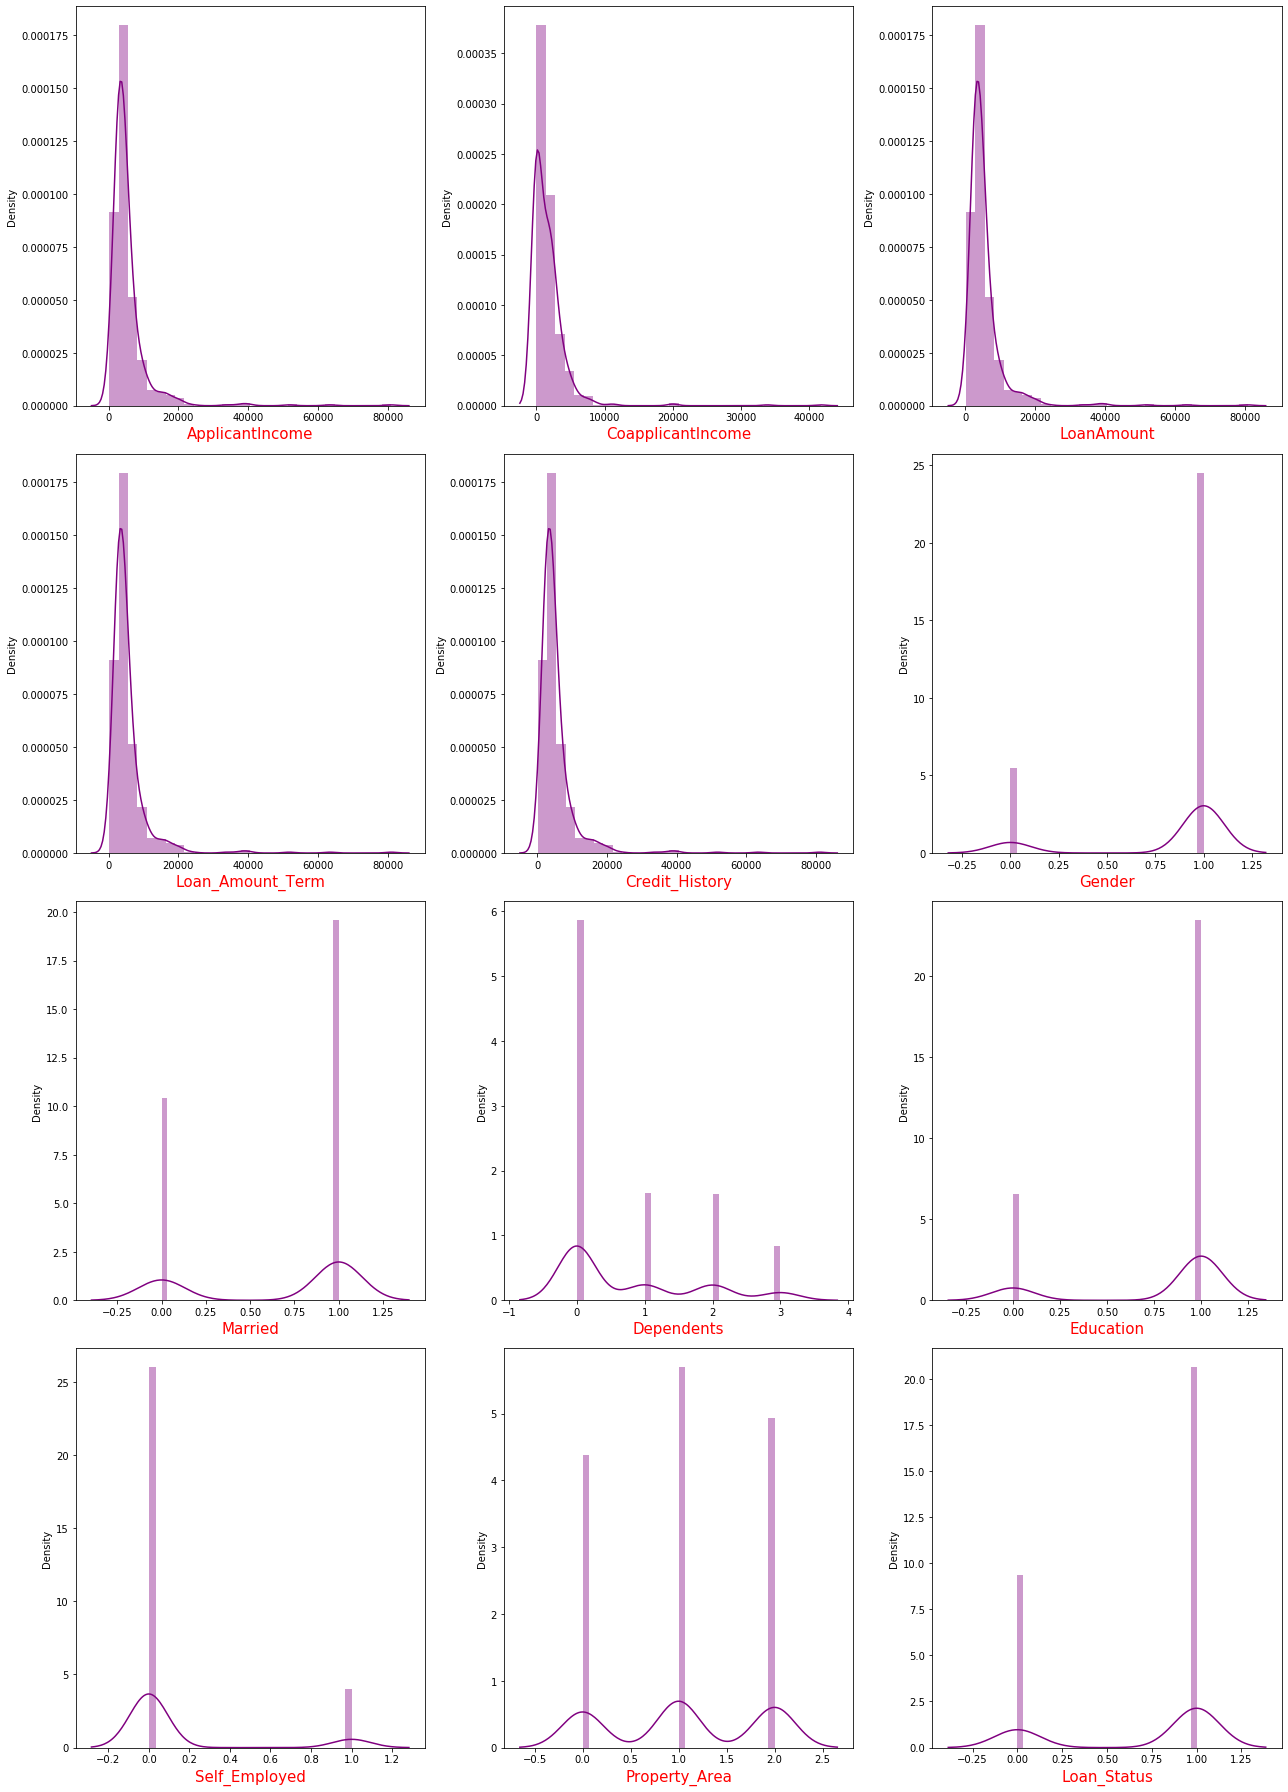

In [61]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in X_data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(X_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for most the columns since we can see a lot of skewness.

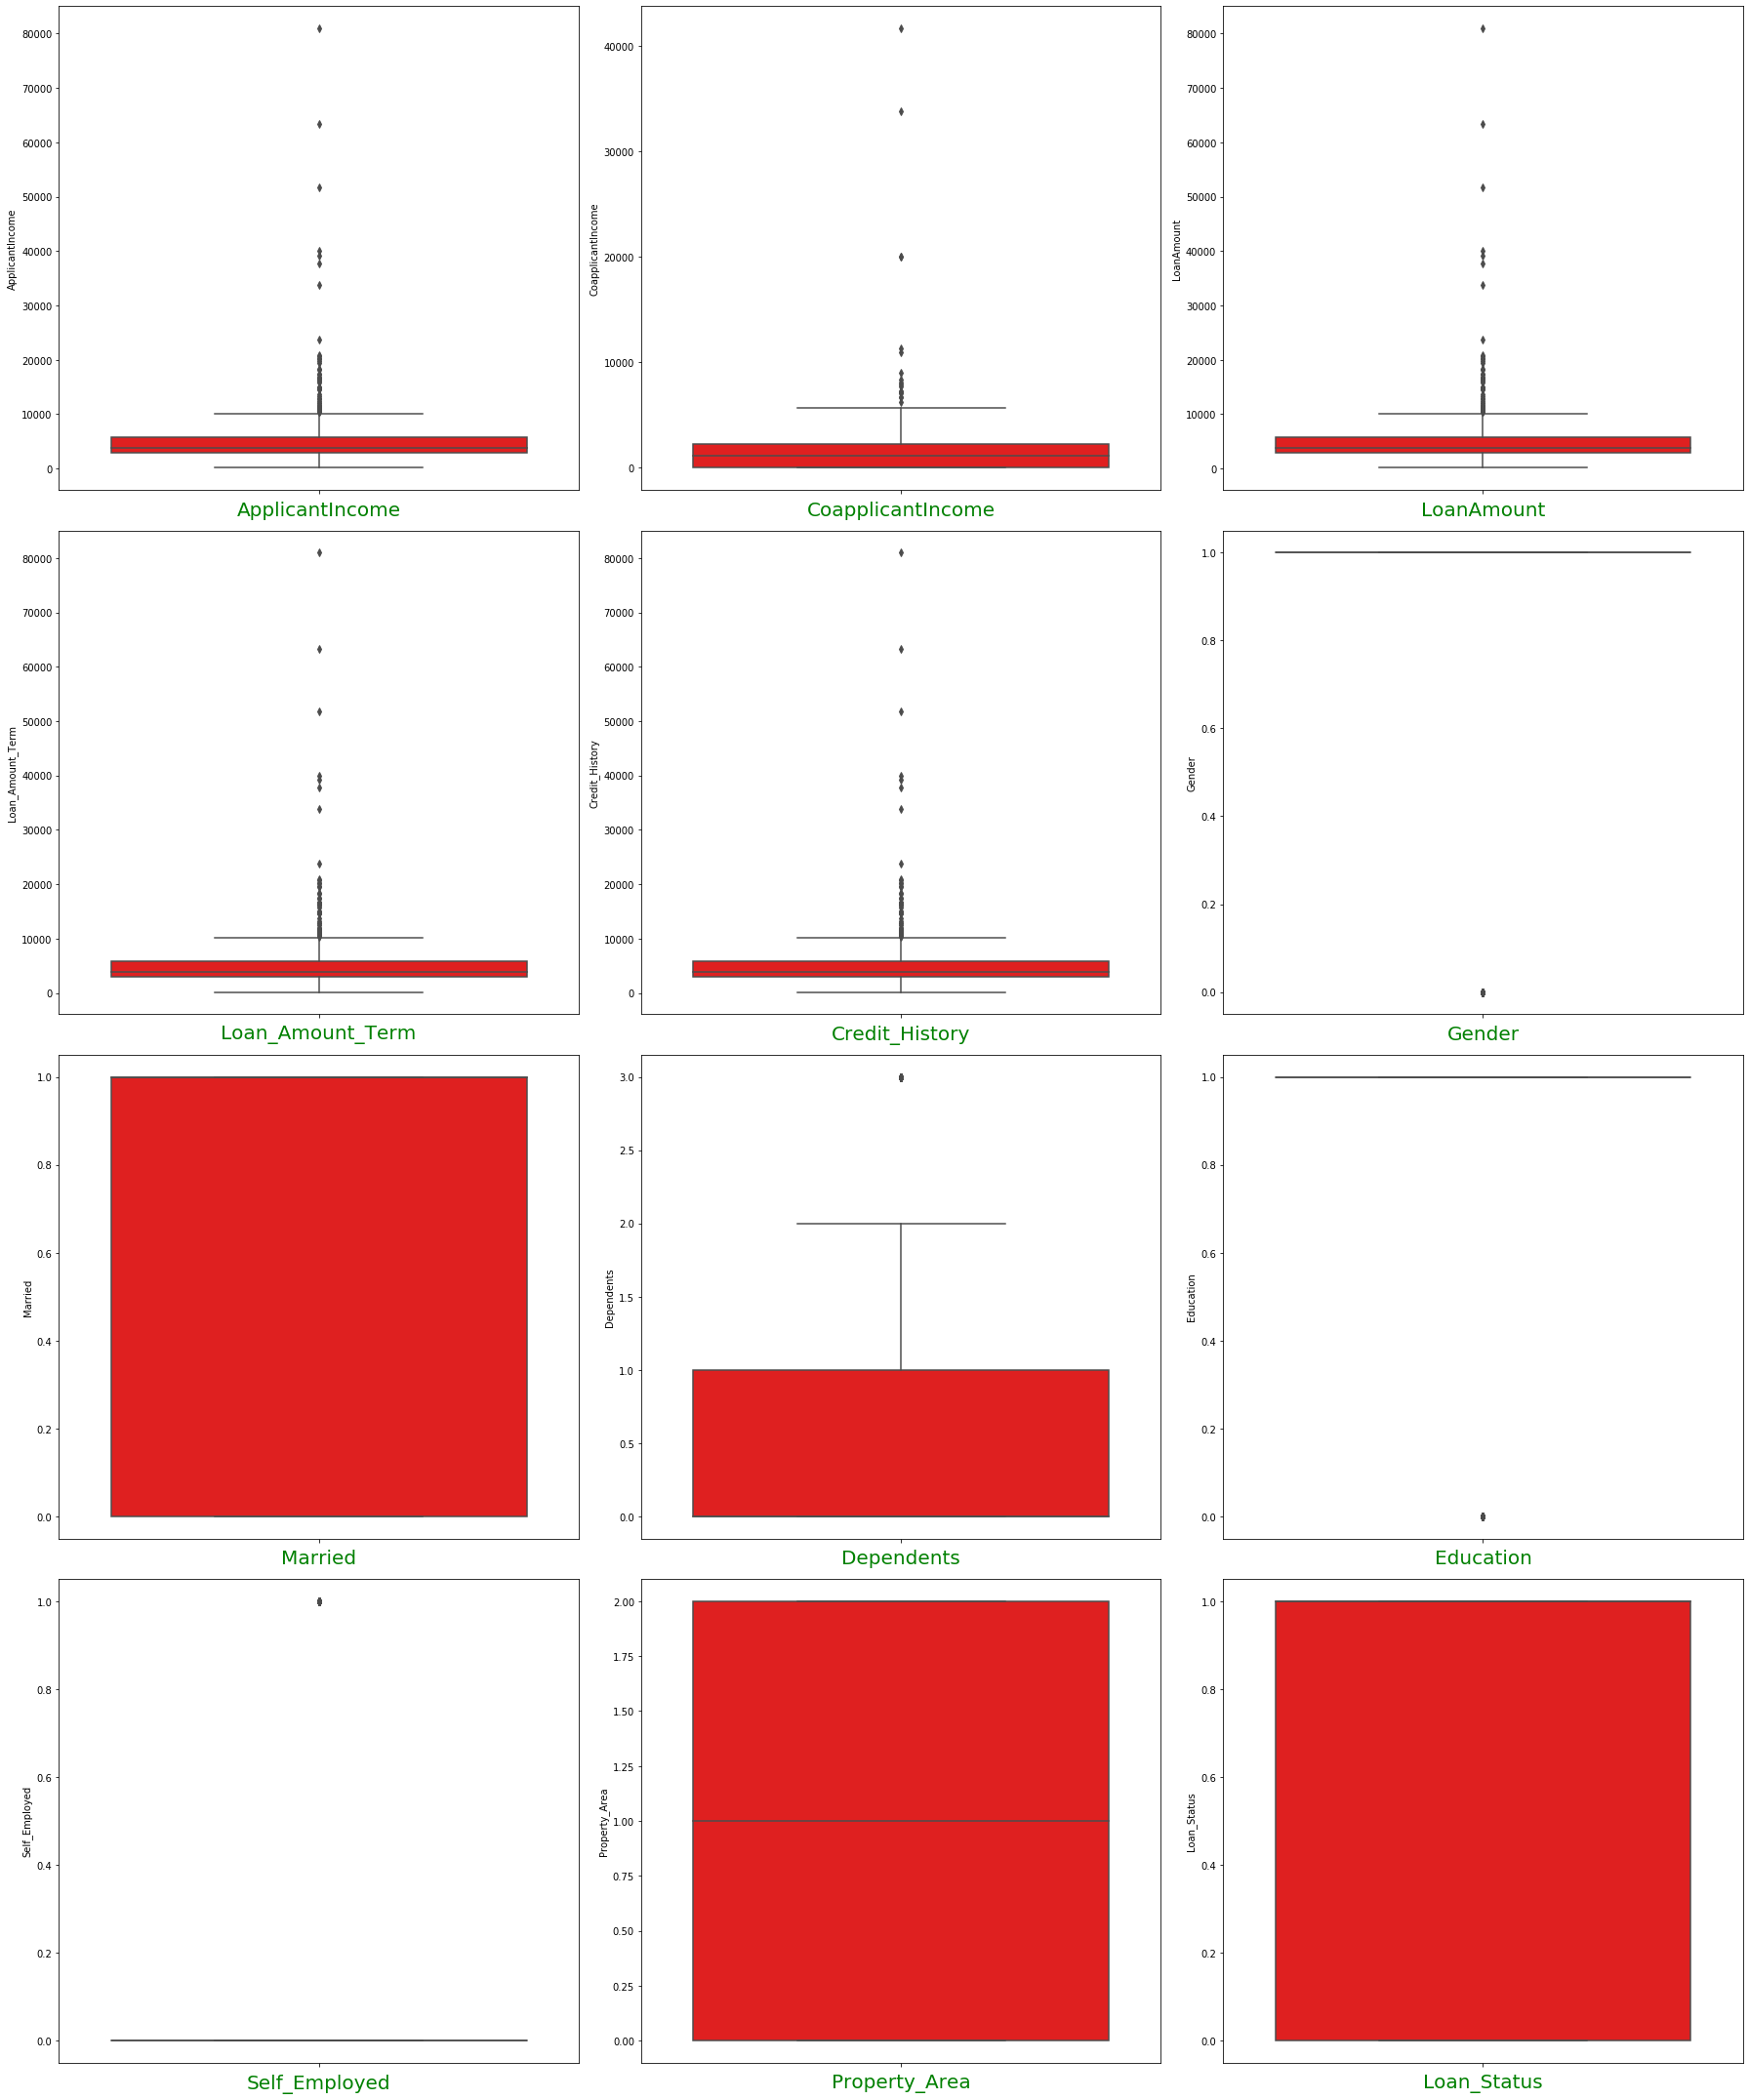

In [62]:
## checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in X_data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y= X_data[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graph we can see outliers in some columns, we will remove the Outliers from the features columns since the label has categorical data not need to remove outliers on it

## skewness removal

In [63]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [64]:
pt=PowerTransformer(method='yeo-johnson')

In [65]:
features = X_data.drop('Loan_Status',axis=1)

### I will remove sknewness from features columns..

In [66]:
X_power=pt.fit_transform(features)

In [67]:
df=pd.DataFrame(X_power,columns=features.columns)

In [68]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003
610,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003
611,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567
612,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567


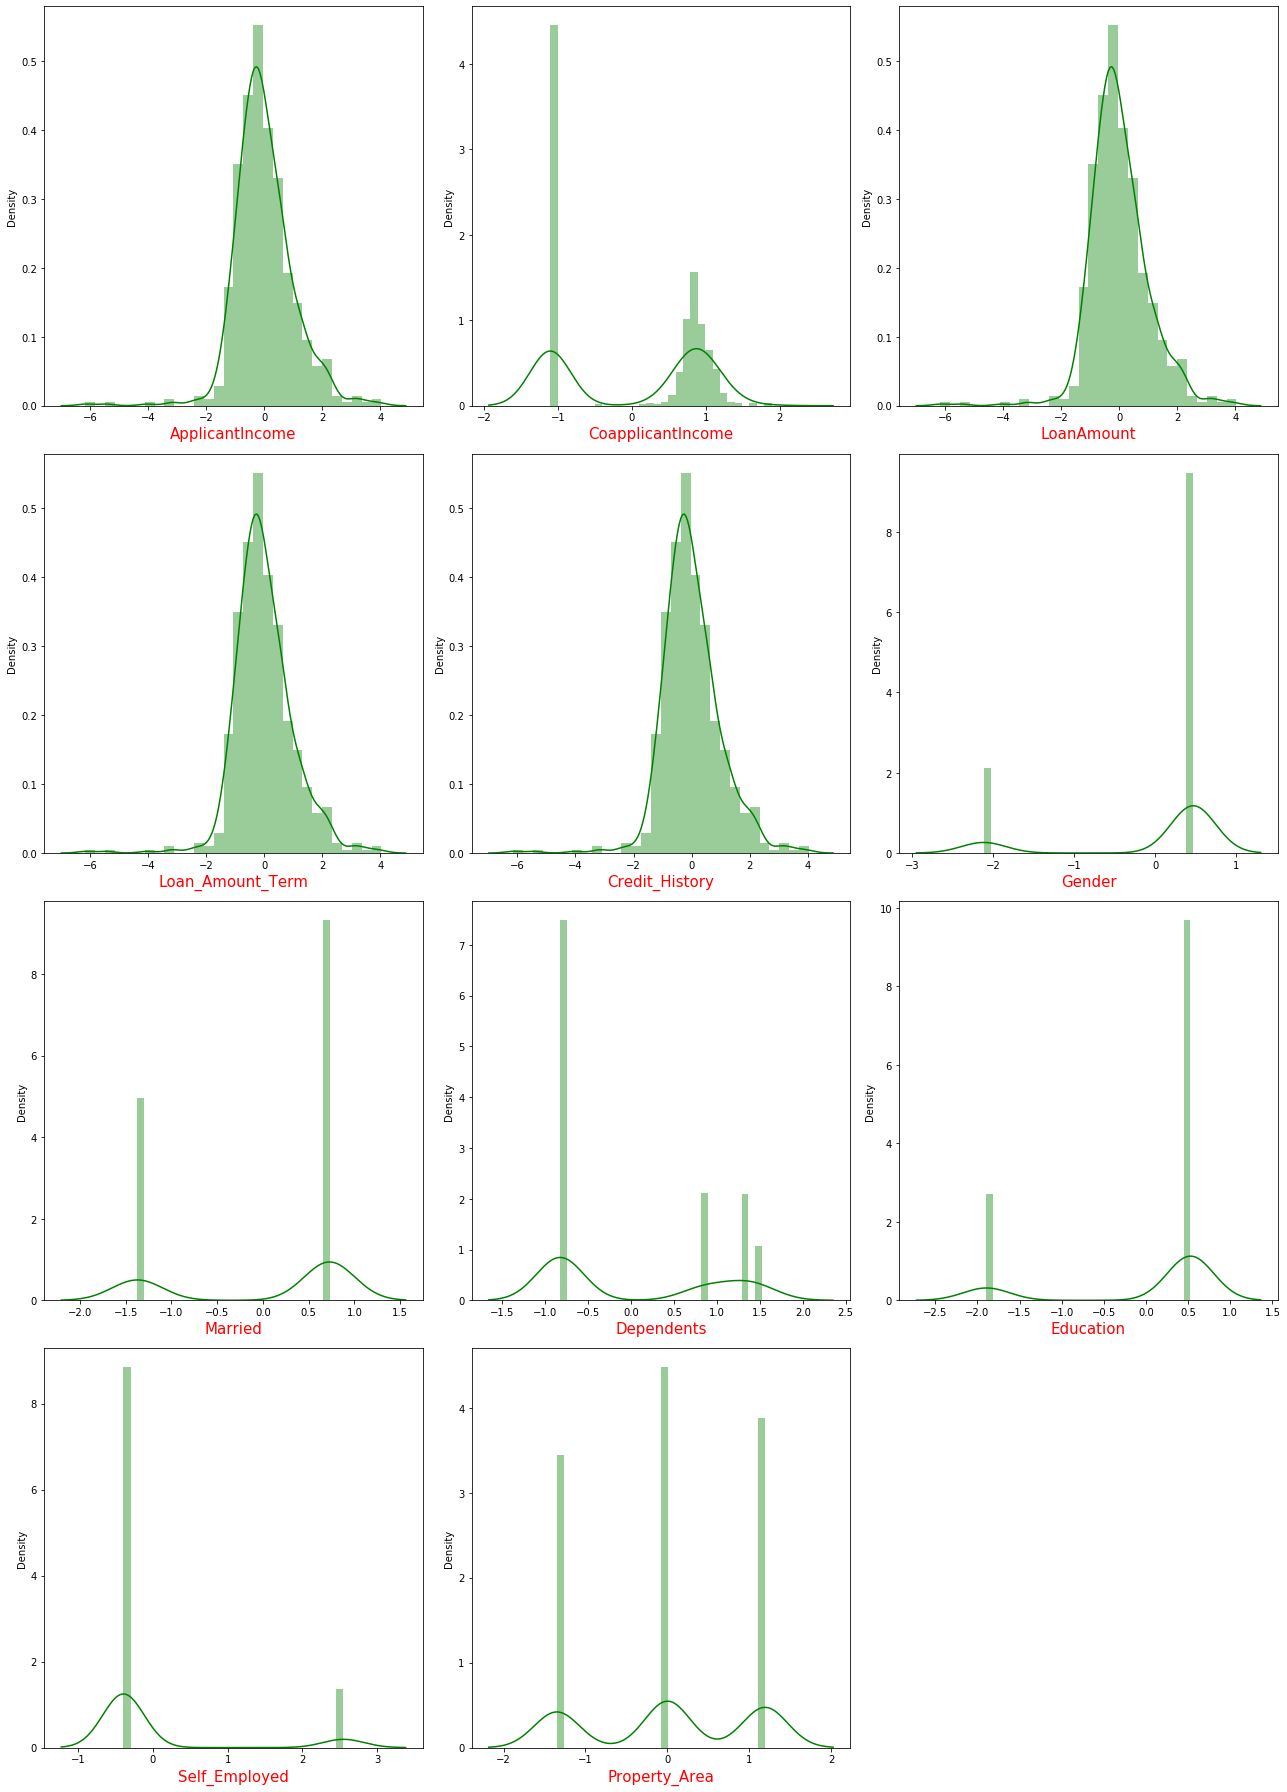

In [70]:
plt.figure(figsize=(18,25))
plotnumber = 1

for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From here can see that our data look better than before, and it has less kewness.

In [71]:
## the concatinate the features and the label and remove the Outliers

unskew_data = pd.concat([df,X_data.Loan_Status],axis=1)

In [72]:

unskew_data.shape

(614, 12)

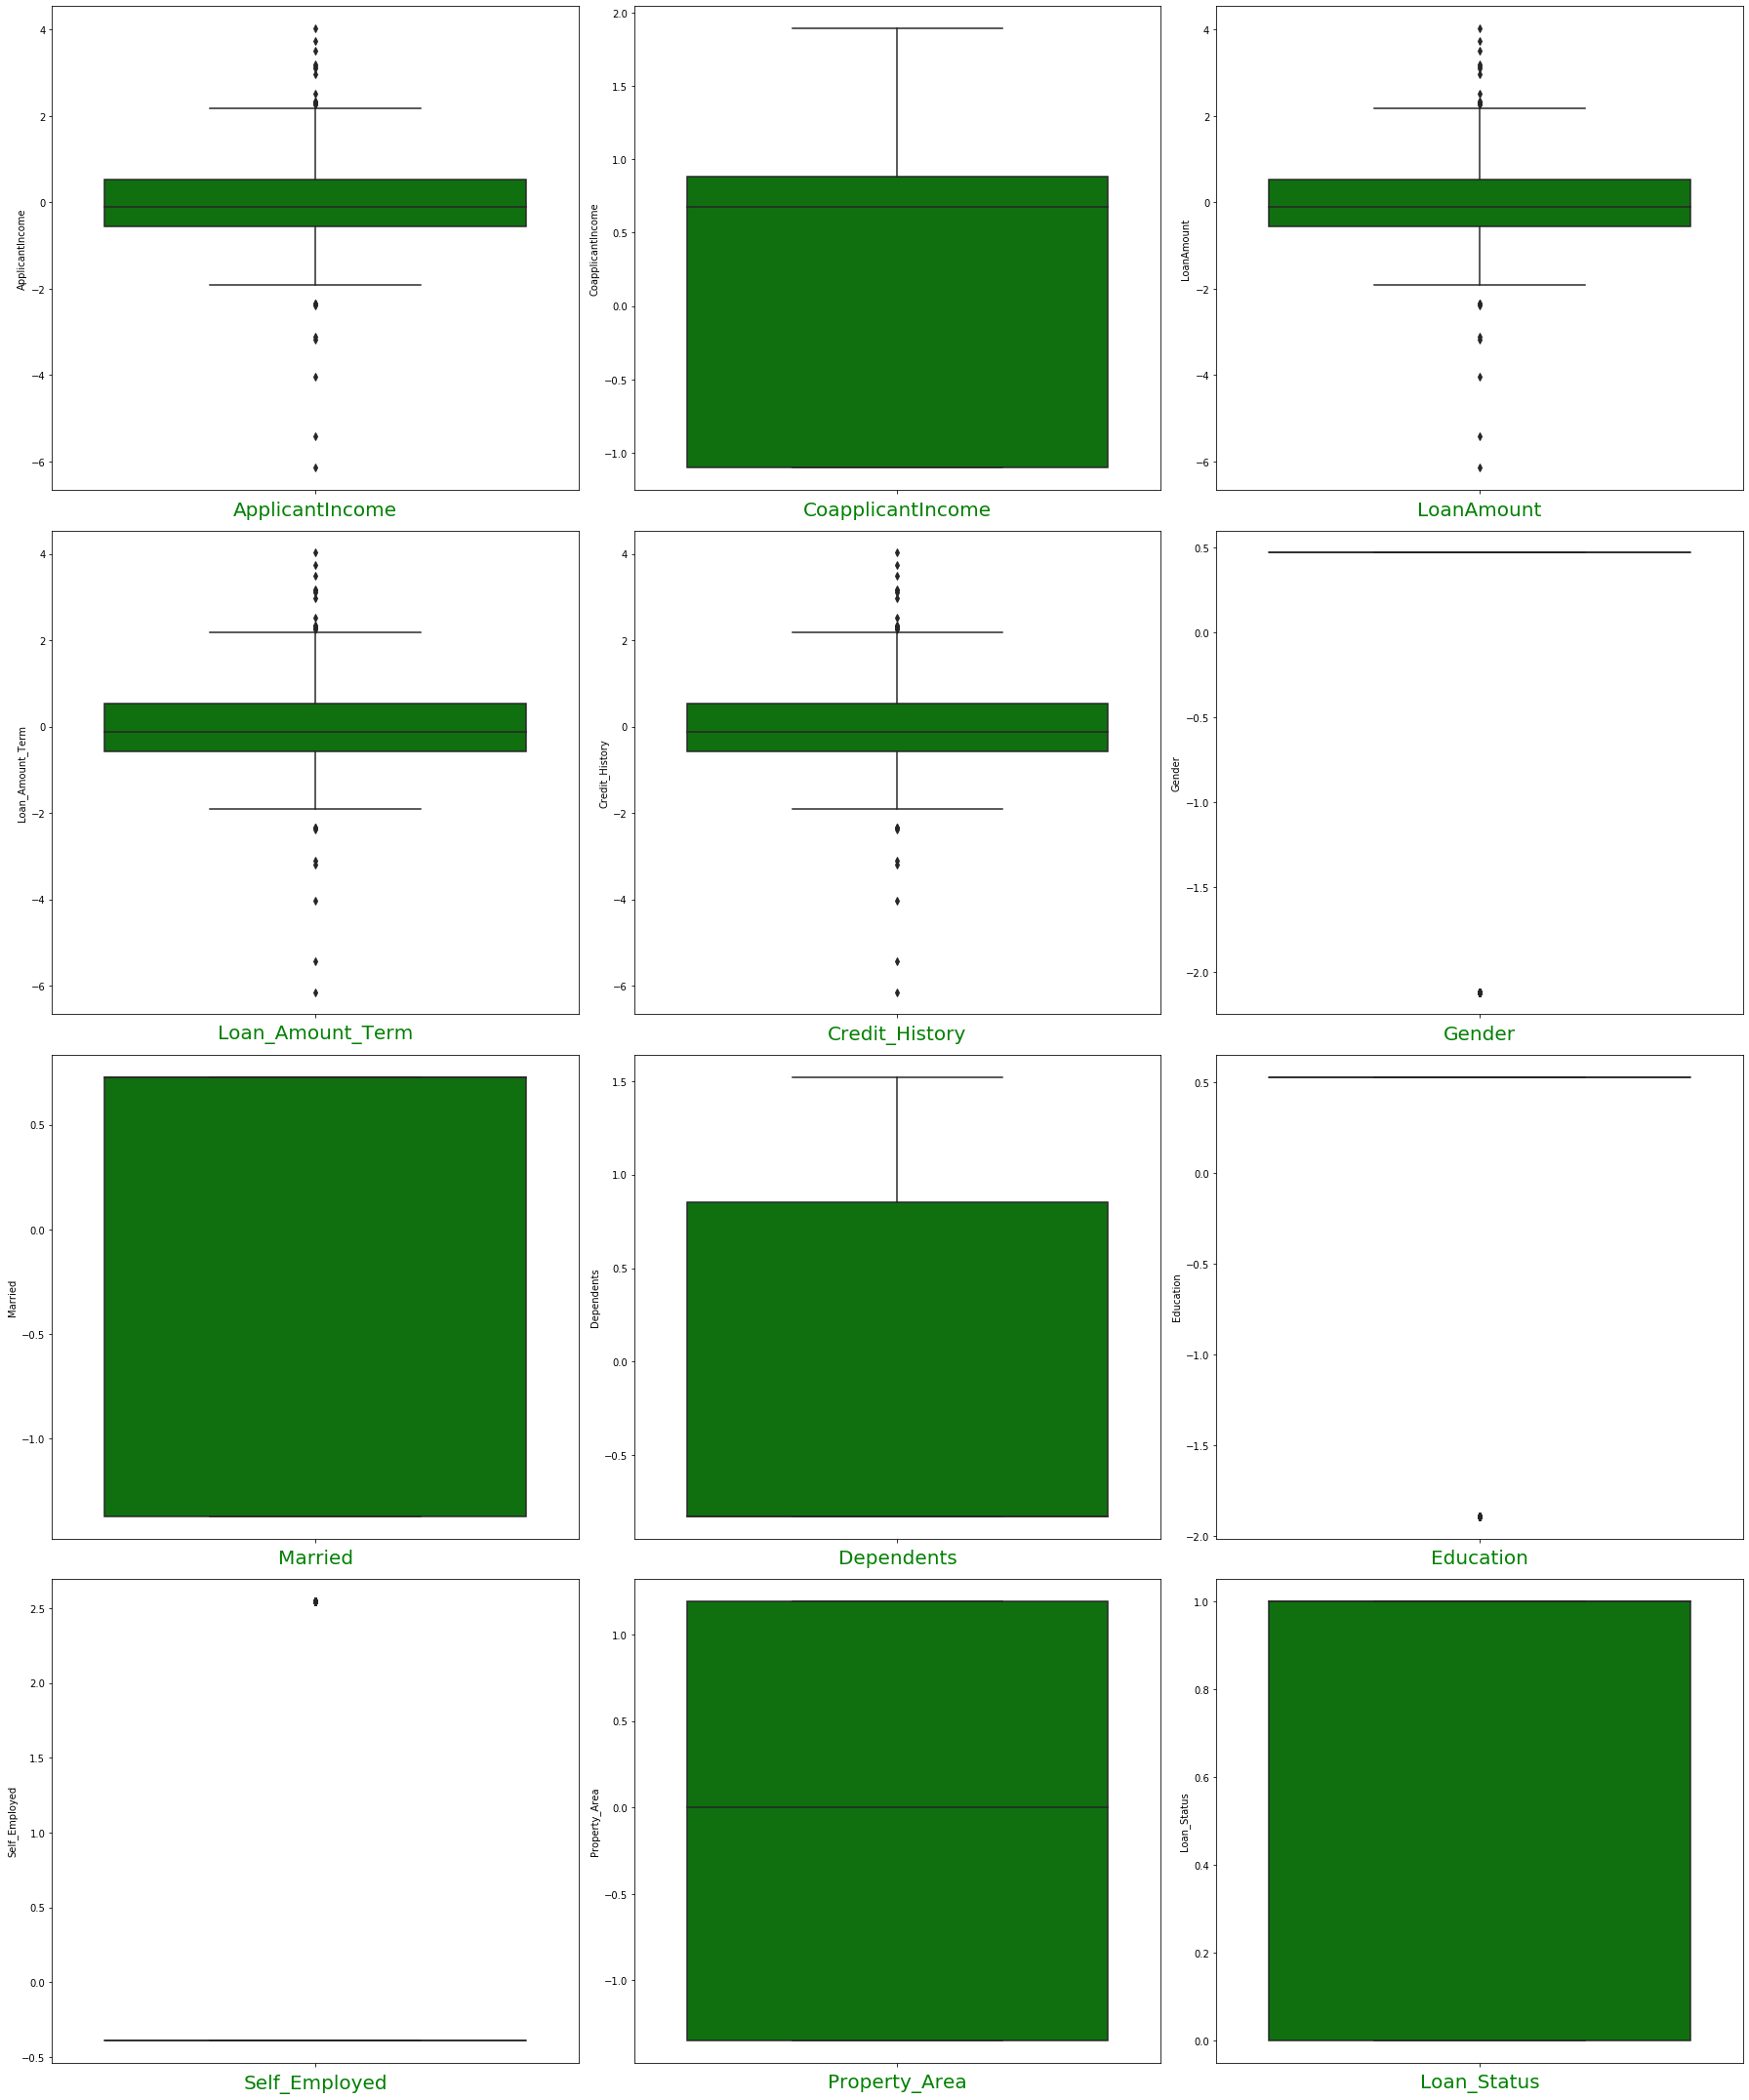

In [73]:
## checking for outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in unskew_data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y= unskew_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### There are some outliers in the columns but most of those columns have categorical data so let's remove outlier from the columns those have continous data.

### Let's use the Quantiles techniques and see if we can remove them..

### Outlier Dectection Formula
### Higher side ===> Q3 + (1.5 * IQR)
### lower side ===> Q1 - (1.5 * IQR)
### IQR = Inter Quantile Rate = Q3 - Q1

In [74]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = unskew_data.quantile(0.25)

# 3rd quantile
q3 = unskew_data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [75]:
unskew_data.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0


In [77]:
high_high_ApplicantIncome = (q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome))
high_high_ApplicantIncome

2.177049452070227

In [78]:
## the get indexes of those records

indexes = np.where(unskew_data['ApplicantIncome'] > high_high_ApplicantIncome)
indexes

(array([126, 130, 155, 171, 183, 185, 284, 308, 333, 369, 409, 443, 506,
        561]),)

In [79]:
## Let's drop indexes from the dataset

unskew_data= unskew_data.drop(unskew_data.index[indexes])
## reset the index
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
596,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
597,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
598,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [80]:
## "LoanAmount",column

indexes = np.where(unskew_data["LoanAmount"] > (q3.LoanAmount + (1.5 * iqr.LoanAmount)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
596,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
597,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
598,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [81]:
## "Loan_Amount_Term",column

indexes = np.where(unskew_data["Loan_Amount_Term"] > (q3.Loan_Amount_Term + (1.5 * iqr.Loan_Amount_Term)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
596,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
597,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
598,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [83]:
## "Credit_History",column

indexes = np.where(unskew_data["Credit_History"] > (q3.Credit_History + (1.5 * iqr.Credit_History)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
596,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
597,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
598,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [90]:
print('**'*50)
print('**'*50)

****************************************************************************************************
****************************************************************************************************


### Let's Remove the outliers from lower side.

In [86]:
indexes = np.where(unskew_data["ApplicantIncome"] < (q3.ApplicantIncome - (1.5 * iqr.ApplicantIncome)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
548,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
549,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
550,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
551,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [87]:
indexes = np.where(unskew_data["LoanAmount"] < (q3.LoanAmount - (1.5 * iqr.LoanAmount)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
548,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
549,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
550,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
551,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [88]:
indexes = np.where(unskew_data["Loan_Amount_Term"] < (q3.Loan_Amount_Term -(1.5 * iqr.Loan_Amount_Term)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
548,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
549,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
550,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
551,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


In [89]:
indexes = np.where(unskew_data["Credit_History"] < (q3.Credit_History - (1.5 * iqr.Credit_History)))
unskew_data= unskew_data.drop(unskew_data.index[indexes])
unskew_data.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.544331,-1.102837,0.544331,0.544331,0.544331,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
1,0.170974,0.750578,0.170974,0.170974,0.170974,0.472343,0.728816,0.854259,0.528362,-0.392601,-1.350003,0
2,-0.499955,-1.102837,-0.499955,-0.499955,-0.499955,0.472343,0.728816,-0.827104,0.528362,2.547117,1.193567,1
3,-0.743873,0.891686,-0.743873,-0.743873,-0.743873,0.472343,0.728816,-0.827104,-1.892641,-0.392601,1.193567,1
4,0.582817,-1.102837,0.582817,0.582817,0.582817,0.472343,-1.372089,-0.827104,0.528362,-0.392601,1.193567,1
...,...,...,...,...,...,...,...,...,...,...,...,...
548,-0.554885,-1.102837,-0.554885,-0.554885,-0.554885,-2.117107,-1.372089,-0.827104,0.528362,-0.392601,-1.350003,1
549,-0.000290,-1.102837,-0.000290,-0.000290,-0.000290,0.472343,0.728816,1.522278,0.528362,-0.392601,-1.350003,1
550,1.023487,0.208603,1.023487,1.023487,1.023487,0.472343,0.728816,0.854259,0.528362,-0.392601,1.193567,1
551,0.931750,-1.102837,0.931750,0.931750,0.931750,0.472343,0.728816,1.316702,0.528362,-0.392601,1.193567,1


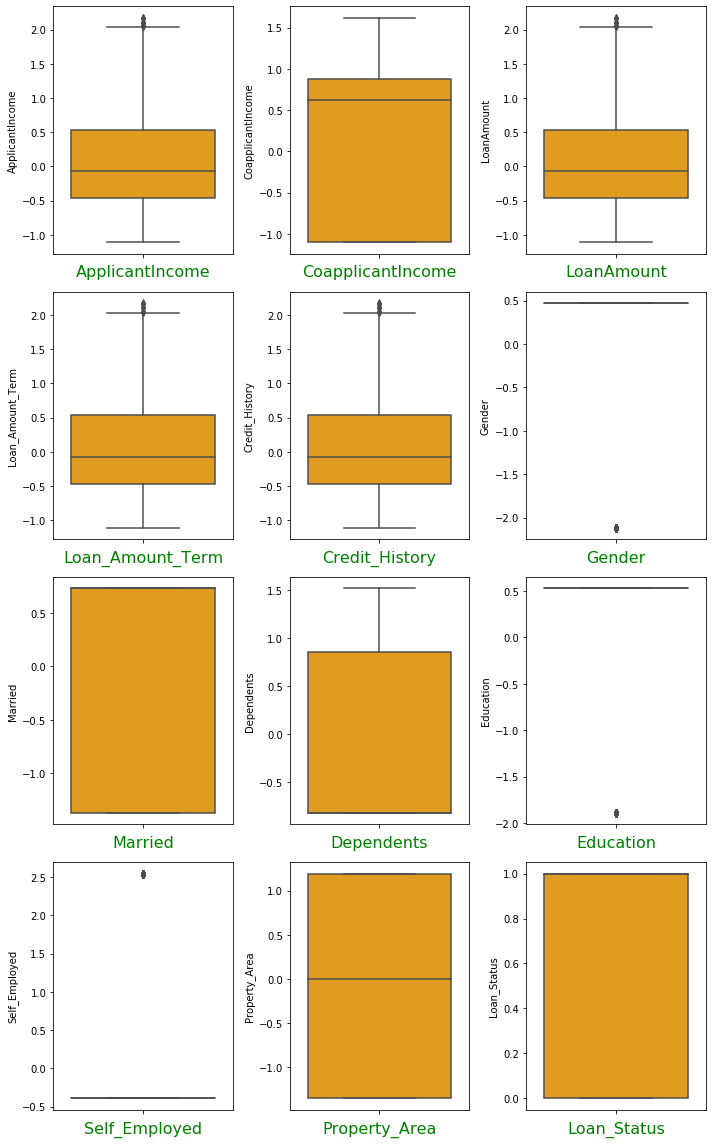

In [93]:
## checking for outliers

plt.figure(figsize=(10,16))
plotnumber = 1

for column in unskew_data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y= unskew_data[column],color='orange',orient='h')
        plt.xlabel(column,fontsize = 16,color='green')
    plotnumber+=1
plt.tight_layout()

### From the boxplot here we can say that our data look better than before after removing the previous outliers from continous data columns.

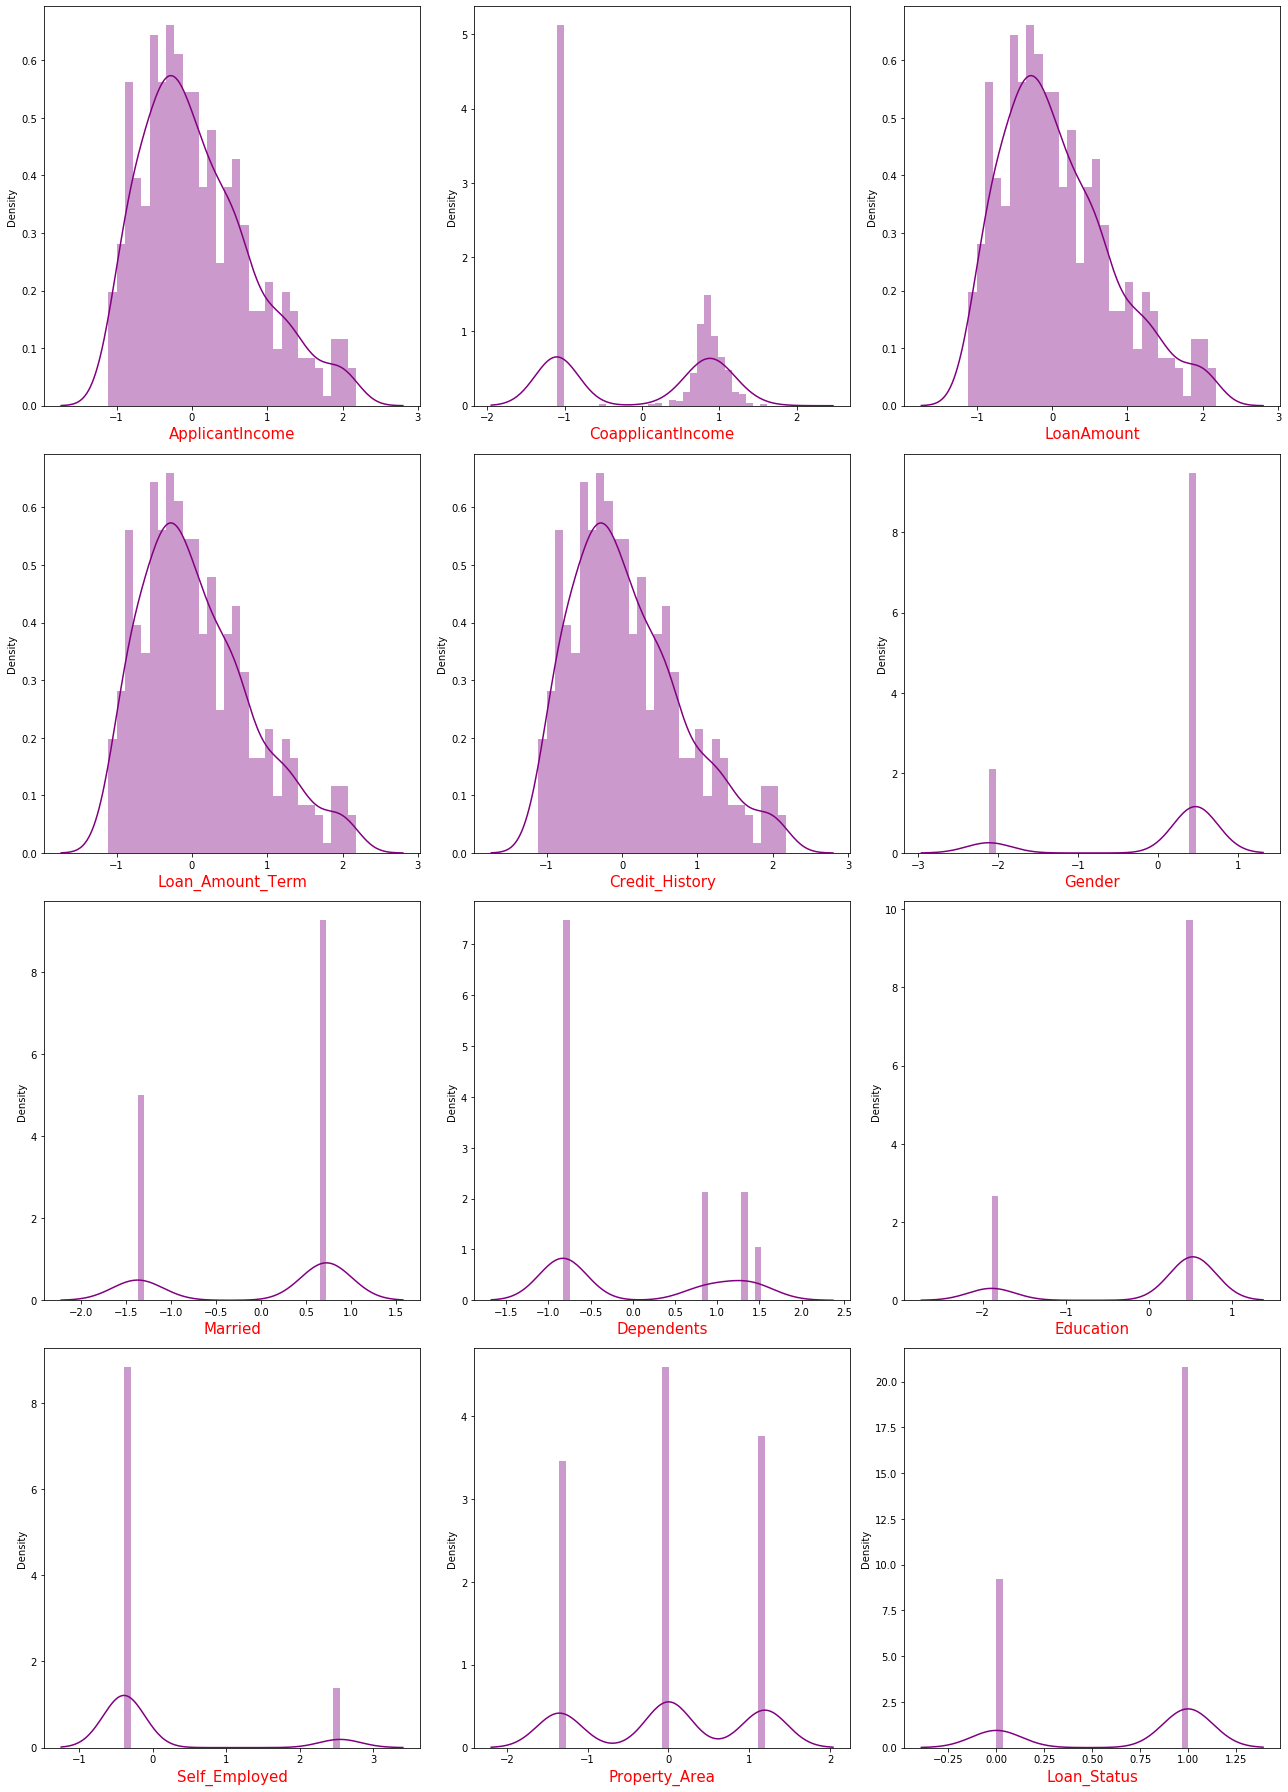

In [94]:
plt.figure(figsize=(18,25))
plotnumber = 1

for column in unskew_data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(unskew_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

#### Again from above distplot we can see that the distribution of data in each attribute look better than before.

### Now let's check if the classes in the label are balanced or not.

In [95]:
from collections import Counter

In [97]:
### checking percentage of each class

counter = Counter(unskew_data['Loan_Status'])
for k, v in counter.items():
    dist = (v/len(unskew_data['Loan_Status']) *100)
    print(f" Class = {k},n={v} ({dist}%)")

 Class = 1,n=383 (69.25858951175407%)
 Class = 0,n=170 (30.74141048824593%)


### We can see that the  data is not balance in the target classes.

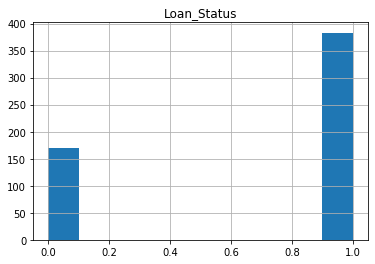

In [98]:
## let's plot it and see how it look like 

unskew_data['Loan_Status'].hist(grid=True)
plt.title('Loan_Status')
plt.show()


### From this histogram we can see that the classes are   imbalance and class 1 is  majority and class 0 minority. So let's handling class imbalance using oversampling the minority class.

In [99]:
## importang the libraries

from imblearn.over_sampling import SMOTE

SM = SMOTE()

In [100]:
## let's seperate our dataset int features and label first.

X = unskew_data.drop('Loan_Status',axis=1)
y = unskew_data.Loan_Status

In [101]:
### let's fit it.
x_over , y_over = SM.fit_resample(X,y)

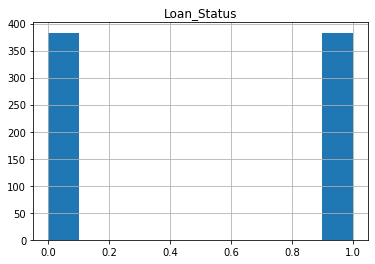

In [102]:
y_over.hist(grid=True)
plt.title('Loan_Status')
plt.show()

### Now we can see that our classes are balanced so we can build the model now. so we can build our first model with dataset. But before fit our data to the model let's see by visualize the relationship between the features and the label usig __stripplot()__ method.


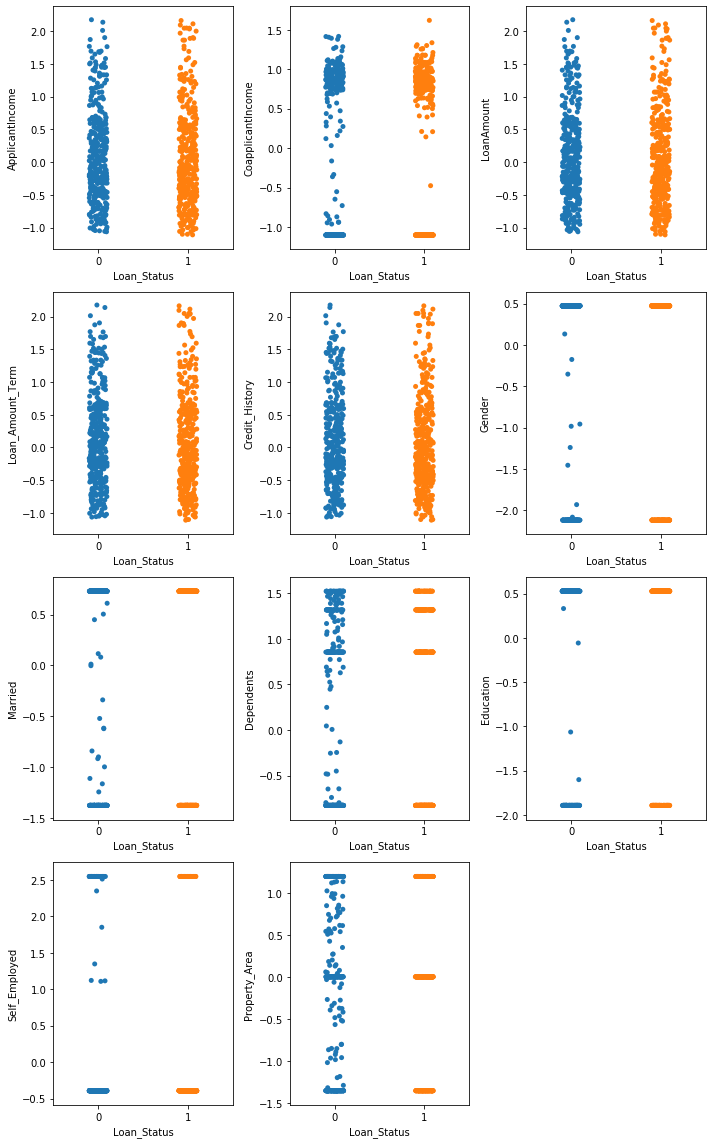

In [103]:
## Let's relationship between the label and fetures using subplot

plt.figure(figsize=(10,16), facecolor='white')
plot_no = 1

for column in x_over:
    if plot_no <= 11:
        ax = plt.subplot(4,3,plot_no)
        sns.stripplot(y_over, x_over[column])
    plot_no+=1
plt.tight_layout()

### From the above graph, we can say that all the features are important and they have a gread relationship with our label data (target Loan_Status)

In [104]:
print('**'*40)
print('**'*40)

********************************************************************************
********************************************************************************


## Now let's build the models and predict the Loan_Status.

In [105]:
### Importing the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [106]:
## Let's found the best random state.
max_accu = 0
max_RS = 0
for i in range(1,400):
    x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)

Best accuracy is : 0.8 on Random_state 130


### This code above help us to find the best random_state = 130 Best accuracy is : 80%

In [107]:
## let's build gain the model using the best random_state

x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=130)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_predlr = lr_model.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, y_predlr))
print('--'*20)
print(confusion_matrix(y_test,y_predlr))
print(classification_report(y_test,y_predlr))

The Accuracy is : 0.8
----------------------------------------
[[10  4]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.78      0.88      0.82        16

    accuracy                           0.80        30
   macro avg       0.81      0.79      0.80        30
weighted avg       0.80      0.80      0.80        30



#### __LogisticRegression model (lr_model) gives accuracy 80%__

## Let's build a more models select the best one

In [109]:
## import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Suport Vector Machine model
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
### DecisionTreeClassifier model.

dt = DecisionTreeClassifier(random_state=130)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_dt))
print('--'*20)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))

The Accuracy is : 0.7333333333333333
----------------------------------------
[[ 9  5]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.72      0.81      0.76        16

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



#### __DecisionTreeClassifier Accuracy is : 73%__

In [121]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [110]:
## RandomForestClassifier

rf = RandomForestClassifier(130)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_rf))
print('--'*20)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

The Accuracy is : 0.7
----------------------------------------
[[ 9  5]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.71      0.75      0.73        16

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



#### __RandomForestClassifier Accuracy is : 70%__

In [111]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [114]:
# Suport Vector Machine model( SVC )

svc = SVC(random_state=130)

svc.fit(x_train, y_train)

pred_svc = svc.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_svc))
print('--'*20)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

The Accuracy is : 0.7333333333333333
----------------------------------------
[[ 9  5]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.72      0.81      0.76        16

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



#### __Suport Vector Machine model gives Accuracy = 73%__

In [113]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [115]:
### GrandientBoostingClassifier model

gbdt_clf = GradientBoostingClassifier(random_state=130)
gbdt_clf.fit(x_train,y_train)
pred_gb = gbdt_clf.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_gb))
print('--'*20)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

The Accuracy is : 0.7666666666666667
----------------------------------------
[[10  4]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.76      0.81      0.79        16

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



#### __GrandientBoostingClassifier model gives accuracy = 77%__

### Let's go for cross validation score and see if there is overfitting or not and wich model performe better among them.

In [117]:
### importing the library
from sklearn.model_selection import cross_val_score

In [118]:
## first  model lr_model

scr = cross_val_score(lr_model,x_over,y_over,cv=7)
print('Cross Validation Score of LogisticRegression model:',scr.mean())
print('--'*35)

Cross Validation Score of LogisticRegression model: 0.5404742046943881
----------------------------------------------------------------------


In [122]:
## second  model dt

scr = cross_val_score(dt,x_over,y_over,cv=7)
print('Cross Validation Score of DecisionTreeClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of DecisionTreeClassifier model: 0.6935064935064935
----------------------------------------------------------------------


In [127]:
## Third model rf

scr = cross_val_score(rf,x_over,y_over,cv=7)
print('Cross Validation Score of  RandomForestClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of  RandomForestClassifier model: 0.7221613249136185
----------------------------------------------------------------------


In [128]:
## Fourth model svc

scr = cross_val_score(svc,x_over,y_over,cv=7)

print('Cross Validation Score of Suport Vector Machine model:',scr.mean())
print('--'*35)

Cross Validation Score of Suport Vector Machine model: 0.6345526033599428
----------------------------------------------------------------------


In [129]:
## Fith model GradientBoostingClassifier

scr = cross_val_score(gbdt_clf,x_over,y_over,cv=7)

print('Cross Validation Score of GradientBoostingClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of GradientBoostingClassifier model: 0.6830930537352556
----------------------------------------------------------------------


## Let's check the diffrence values between Cross Validation and the Accuracy of each model.

In [130]:
print('\nLogisticRegression model diff is:',80 -54)
print('--'*35)
print('\nDecisionTreeClassifier model diff is:',73 -69)
print('--'*35)
print('\nRandomForestClassifier  model diff is:',70 -72)
print('--'*35)
print('\nSuport Vector Machine model diff is:',73 -63)
print('--'*35)
print('\nGradientBoostingClassifier model diff is:',77 -68)


LogisticRegression model diff is: 26
----------------------------------------------------------------------

DecisionTreeClassifier model diff is: 4
----------------------------------------------------------------------

RandomForestClassifier  model diff is: -2
----------------------------------------------------------------------

Suport Vector Machine model diff is: 10
----------------------------------------------------------------------

GradientBoostingClassifier model diff is: 9


### The minimum defference in accuracy and cross validation score is for RandomForestClassifier model, So it is our best model.

### __We are selected the RandomForestClassifier with accuracy: 70% as our best model.__

## Let's try if we can improve the performance of our model using Hyperparameter Tuning

In [131]:
### importing the libraries

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [133]:

# We are tuning three hyperparamters right now,
# we are passing the different values for both paramters

grid_param = {
    'criterion':['gini','entropy'],
    'max_features': ['sqrt','log2'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2)
}

In [134]:
grid_search = GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=7,
                         n_jobs=-1)

In [135]:

## again train the model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(n_estimators=130),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [136]:
# best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [139]:
## so let's build again the decisionTreeClassifier

rf_model = RandomForestClassifier(criterion='gini',
                            max_features ='log2',
                            max_depth=8,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=130)

In [140]:
## let's fit gain the model with the data

rf_model.fit(x_train,y_train)
pred_drf = rf_model.predict(x_test)
rf_model_report = pd.DataFrame(classification_report(
    y_test,pred_rf,output_dict=True))


print("\n=============Test Result==============")

print(f"Accuracy Score:{accuracy_score(y_test,pred_drf)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_model_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred_drf)}\n")


=============Test Result==============
Accuracy Score:66.67%
_____________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.692308   0.705882       0.7   0.699095      0.699548
recall      0.642857   0.750000       0.7   0.696429      0.700000
f1-score    0.666667   0.727273       0.7   0.696970      0.698990
support    14.000000  16.000000       0.7  30.000000     30.000000
_____________________________________________
Confusion Matrix:
[[ 8  6]
 [ 4 12]]



### After Hyper paramter Turning we are not able to improve our model accury from 70 % Accuracy to 66% Accuracy so let's save model as it is.

### Conclusion: __RandomForestClassifier is our best model with 70% accuracy.__

#### __model saving__

In [141]:
import joblib

In [142]:
joblib.dump(rf,'Loan_status_prediction_model.pkl')

['Loan_status_prediction_model.pkl']

In [143]:
## let's predict the row of our cleaned data 

rf.predict([[0.544331,1.102837,0.544331,0.544331,0.544331,0.472343,1.372089,0.827104,0.528362,0.392601,1.193567]])

array([1])

### From the above result we can see that our model did the right prediction.

### __END OF THE PROJECT.__